In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('gps_raw.csv')
data.head()

,ids,latitude,longitude,file
0,0,39.984702,116.318417,0
1,0,39.984683,116.318450,0
2,0,39.984686,116.318417,0
3,0,39.984688,116.318385,0
4,0,39.984655,116.318263,0


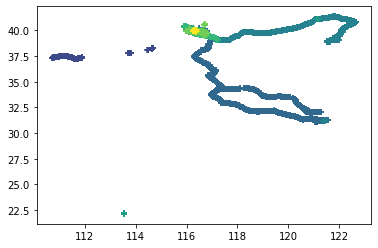

In [3]:
plt.scatter(x=data['longitude'], y=data['latitude'], c=data['ids'], marker="+")
plt.show()

In [4]:
data.isnull().sum()

ids          0
latitude     0
longitude    0
file         0
dtype: int64

In [5]:
def hash(sourcedf,destinationdf,*column):
    columnName = ''
    destinationdf['hash_'+columnName.join(column)] = pd.DataFrame(sourcedf[list(column)].values.sum(axis=1))[0].str.encode('utf-8').apply(lambda x: (hashlib.sha512(x).hexdigest().upper()))

In [6]:
data['ids'] = data['ids'].astype(str)
data.dtypes

ids           object
latitude     float64
longitude    float64
file           int64
dtype: object

In [7]:
import hashlib
import random
#data.drop(labels='file',axis =1,inplace=True)
hashed_data = data
hash(data,hashed_data,'ids')
hashed_data.drop(columns=['ids'], inplace=True)
hashed_data.head()

,latitude,longitude,file,hash_ids
0,39.984702,116.318417,0,31BCA02094EB78126A517B206A88C73CFA9EC6F704C703...
1,39.984683,116.318450,0,31BCA02094EB78126A517B206A88C73CFA9EC6F704C703...
2,39.984686,116.318417,0,31BCA02094EB78126A517B206A88C73CFA9EC6F704C703...
3,39.984688,116.318385,0,31BCA02094EB78126A517B206A88C73CFA9EC6F704C703...
4,39.984655,116.318263,0,31BCA02094EB78126A517B206A88C73CFA9EC6F704C703...


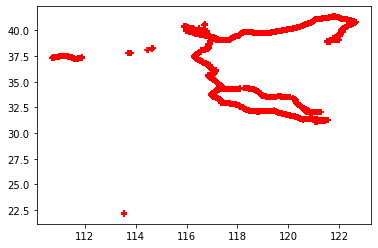

In [9]:
plt.scatter(x=hashed_data['longitude'], y=data['latitude'], c='red', marker="+")
plt.show()